In [10]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Ignoring Unnecessary Warnings.

In [11]:
# This below function will remove messed and unnecessary output
# and provide only clean and relevent ouput

import os
import warnings
warnings.filterwarnings("ignore")
os.environ["YOLO_VERBOSE"] = "True"

# Installing Pytorch engine and Ultralytics

In [12]:
# here we are installing YOLO new version

!pip install -U ultralytics --quiet

import os
import warnings
warnings.filterwarnings("ignore")
os.environ["YOLO_VERBOSE"] = "True"

from ultralytics import YOLO
import torch

print("is Cuda Available", torch.cuda.is_available())  

is Cuda Available True


# Visualization

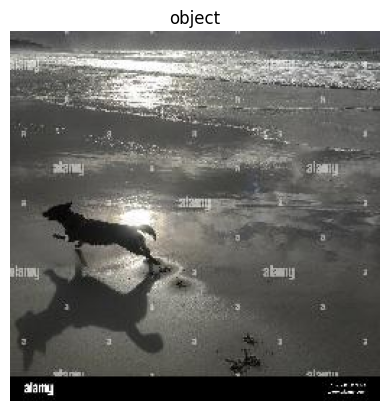

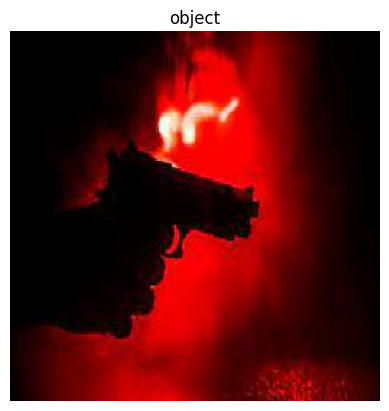

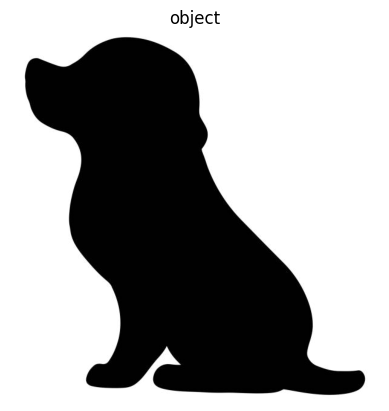

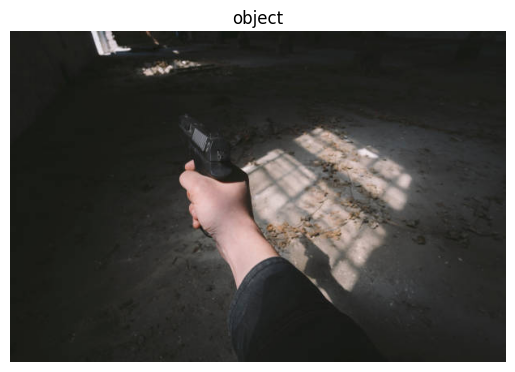

In [13]:
import os, random, matplotlib.pyplot as plt, matplotlib.image as mpimg
G = "/kaggle/input/s-d-3000/SD-3000/SD-3000/train/images"
for i in random.sample(os.listdir(G), 4):
    plt.imshow(mpimg.imread(os.path.join(G, i)), cmap='gray')
    plt.title("object")
    plt.axis('off')
    plt.show()

# Dataset Checking 

In [14]:
base_path = "/kaggle/input/s-d-3000/SD-3000/SD-3000"

for split in ["train", "val", "test"]:
    img_count = len(os.listdir(f"{base_path}/{split}/images"))
    lbl_count = len(os.listdir(f"{base_path}/{split}/labels"))
    print(f"{split.upper()}: Images = {img_count}, Labels = {lbl_count}")

# here we are checking the qauntity of images 
# in a dataset .


TRAIN: Images = 2100, Labels = 1929
VAL: Images = 451, Labels = 415
TEST: Images = 451, Labels = 429


# Making files of data.yaml 

In [15]:
%%writefile data.yaml
path: /kaggle/input/s-d-3000/SD-3000/SD-3000    # direct input folder

train: train/images
val: val/images
test: test/images

nc: 4
names: ['cow_shadow', 'dog_shadow', 'gun_shadow', 'human_shadow']

# here we are  making files of data.yaml 

Overwriting data.yaml


# checking new label file

In [16]:

!cat data.yaml

path: /kaggle/input/s-d-3000/SD-3000/SD-3000    # direct input folder

train: train/images
val: val/images
test: test/images

nc: 4
names: ['cow_shadow', 'dog_shadow', 'gun_shadow', 'human_shadow']

# here we are  making files of data.yaml 


# Loading Pretrained Model YOLO 

In [17]:
# Loading pretrained model 
model = YOLO("yolov8m.pt") 

# Ultralytics Training Block 

In [18]:
model.train(
    data = "data.yaml", # assingning our label file to model
    epochs = 50,       # epochs 
    patience = 20,      # means if there is no improvement till 50 
    imgsz = 640,          # stop training   
    batch = 16,            
    augment = True,          # strong augmentation on
    close_mosaic = 10,       # last 10 epochs  clean training
    amp = True,              # faster training function 
    project = "/kaggle/working/runs",
    name = "shadow_detect_v3"
)


# data = "data.yaml" : 
#        master file of our dataset 
#        here yolo will get to know that 
#        where our images and their 
#        respective label are located . 



# patience = 20 :
              # assigning patience 20 , means if till 20 
              # epoch the validation are not improved 
              # then we model automatic do callback 
              # or early stopping


# augment = True : 
              #  Strong Augumentation assigned
              # automatic will do flip , rotate , scale 
              # brightness change .
        # will also reduce the risk ofoverfitting 
        # and will better perform in the real world


# close_mosaic = 10, 
         # The model sees four different objects or classes
         #   together in a single image and understands
         #  the differences between them more effectively.
         #  here 10 means it will do this 10 types 
         #  for better understandings


# amp = True,
           # function for faster training 


# project = "/kaggle/working/runs".
        # assigning path for our projects


#name = "shadow_detect_v2"
           # training version name 

Ultralytics 8.3.243 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=shadow_detect_v32, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=20, perspective=0.0, plots=True, pos

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e67e976ee10>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

# Loading Our Saved Best Model 

In [19]:
# here we are loading our trained model
best_model = YOLO("/kaggle/working/runs/shadow_detect_v3/weights/best.pt") 


# Evaluation Matrics over Validation

In [27]:
# ---------------- VALIDATION ----------------
Pythonmetrics = best_model.val(
    data="data.yaml",
    imgsz=640,
    batch=16,
    conf = 0.10,
    plots=True
)

print("Validation mAP50-95:", Pythonmetrics.box.map)
print("Validation mAP50:", Pythonmetrics.box.map50)
print("Validation Precision:", Pythonmetrics.box.p)
print("Validation Recall:", Pythonmetrics.box.r)


Ultralytics 8.3.243 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 92.3±72.6 MB/s, size: 39.9 KB)
val: Scanning /kaggle/input/s-d-3000/SD-3000/SD-3000/val/labels... 414 images, 39 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 451/451 1.1Kit/s 0.4s<0.0s
WARNING ⚠️ val: Cache directory /kaggle/input/s-d-3000/SD-3000/SD-3000/val is not writable, cache not saved.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 29/29 4.0it/s 7.3s0.2s
                   all        451        542      0.345      0.401      0.289      0.152
            cow_shadow         45         53      0.449       0.17      0.283      0.145
            dog_shadow        134        146      0.167      0.747      0.244       0.12
            gun_shadow        137        239      0.275       0.18      0.148      0.079
          human_shadow        102        104      0.489       0.51       0.48

In [25]:
# ---------------- PREDICTION (50 TEST IMAGES) ----------------
from pathlib import Path

img_dir = Path("/kaggle/input/s-d-3000/SD-3000/SD-3000/test/images")

image_list = sorted(
    list(img_dir.glob("*.jpg")) +
    list(img_dir.glob("*.png")) +
    list(img_dir.glob("*.jpeg"))
)[:50]

print("Total images used for prediction:", len(image_list))

results = best_model.predict(
    source=image_list,
    conf=0.1,
    imgsz=640,
    save=True,
    project="/kaggle/working/runs",
    name="test_predictions"
)


SyntaxError: unmatched ')' (2444374501.py, line 2)

# Evaluation Matrics over Test Set 

In [21]:
test_metrics = best_model.val( # default set gain for yolo 
    data="data.yaml",
    split="test",  # best will predict over test set          
    imgsz=640,
    conf=0.7,              
    iou=0.6,
    plots=True,
    save=True
)



# print("Validation mAP50-95:", Pythonmetrics.box.map)
# print("mAP50:", Pythonmetrics.box.map50)
print("TEST Precision:", test_metrics.box.p)
print("TEST Recall:", test_metrics.box.r)
print("TEST mAP50-95:", test_metrics.box.map)
print("TEST mAP50:", test_metrics.box.map50)


Ultralytics 8.3.243 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 13.6±12.2 MB/s, size: 82.2 KB)
val: Scanning /kaggle/input/s-d-3000/SD-3000/SD-3000/test/labels... 428 images, 27 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 451/451 189.5it/s 2.4s<0.0s
WARNING ⚠️ val: Cache directory /kaggle/input/s-d-3000/SD-3000/SD-3000/test is not writable, cache not saved.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 29/29 4.8it/s 6.1s0.2s
                   all        451        563      0.339     0.0426      0.181      0.135
            cow_shadow         53         73          1     0.0274      0.514      0.412
            dog_shadow        130        140      0.357      0.143      0.209       0.13
            gun_shadow        116        118          0          0          0          0
          human_shadow        129        232          0          0        

In [ ]:
from pathlib import Path

img_dir = Path("/kaggle/input/s-d-3000/SD-3000/SD-3000/test/images")

image_list = sorted(
    list(img_dir.glob("*.jpg")) +
    list(img_dir.glob("*.png")) +
    list(img_dir.glob("*.jpeg"))
)[:50]

best_model.predict(
    source=image_list,
    conf=0.25,
    imgsz=640,
    save=True,
    project="/kaggle/working/runs",
    name="test_50_predictions"
)


# 

In [22]:
# from pathlib import Path

# # Step 1: Test images folder
# img_dir = Path("/kaggle/input/s-d-3000/SD-3000/SD-3000/test/images")

# # Step 2: Sirf pehli 50 images uthao
# image_list = sorted(
#     list(img_dir.glob("*.jpg")) +
#     list(img_dir.glob("*.png")) +
#     list(img_dir.glob("*.jpeg"))
# )[:50]

# print("Total images used:", len(image_list))  # check = 50

# # Step 3: YOLO prediction (sirf 50 images pe)
# results = best_model.predict(
#     source=image_list,
#     conf=0.1,
#     imgsz=640,
#     save=True,
#     project="/kaggle/working/runs",
#     name="test_predictions"
# )



Total images used: 50

0: 640x640 1 dog_shadow, 9.6ms
1: 640x640 9 dog_shadows, 2 gun_shadows, 9.6ms
2: 640x640 3 cow_shadows, 7 dog_shadows, 9.6ms
3: 640x640 8 dog_shadows, 9.6ms
4: 640x640 3 dog_shadows, 4 human_shadows, 9.6ms
5: 640x640 8 dog_shadows, 9.6ms
6: 640x640 1 cow_shadow, 7 dog_shadows, 2 gun_shadows, 9.6ms
7: 640x640 1 cow_shadow, 6 dog_shadows, 9.6ms
8: 640x640 3 dog_shadows, 9.6ms
9: 640x640 1 dog_shadow, 9.6ms
10: 640x640 2 cow_shadows, 13 dog_shadows, 9.6ms
11: 640x640 6 dog_shadows, 9.6ms
12: 640x640 4 dog_shadows, 9.6ms
13: 640x640 6 cow_shadows, 6 dog_shadows, 9.6ms
14: 640x640 8 dog_shadows, 9.6ms
15: 640x640 11 dog_shadows, 2 gun_shadows, 9.6ms
16: 640x640 11 dog_shadows, 1 gun_shadow, 9.6ms
17: 640x640 8 dog_shadows, 9.6ms
18: 640x640 11 dog_shadows, 1 human_shadow, 9.6ms
19: 640x640 8 dog_shadows, 1 gun_shadow, 9.6ms
20: 640x640 1 cow_shadow, 16 dog_shadows, 9.6ms
21: 640x640 1 cow_shadow, 10 dog_shadows, 9.6ms
22: 640x640 9 dog_shadows, 3 gun_shadows, 9.6ms
23

In [23]:
!ls /kaggle/working/runs/shadow_detect_v2

ls: cannot access '/kaggle/working/runs/shadow_detect_v2': No such file or directory


In [24]:
!ls /kaggle/working/runs/detect/test_predictions

ls: cannot access '/kaggle/working/runs/detect/test_predictions': No such file or directory
